In [1]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


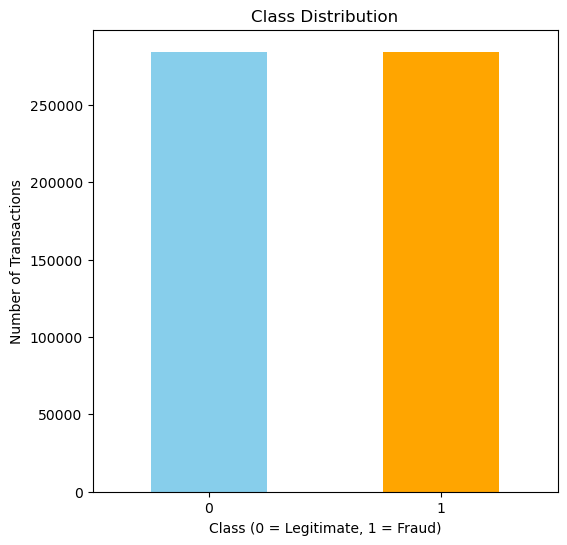

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path = r'C:\Users\ADMIN\OneDrive\Desktop\TERM 1\BEMM457 Topics in BA\creditcard_2023.csv'

dataset = pd.read_csv(file_path)

# 1. Class Distribution Analysis
class_counts = dataset['Class'].value_counts()
plt.figure(figsize=(6, 6))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class (0 = Legitimate, 1 = Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

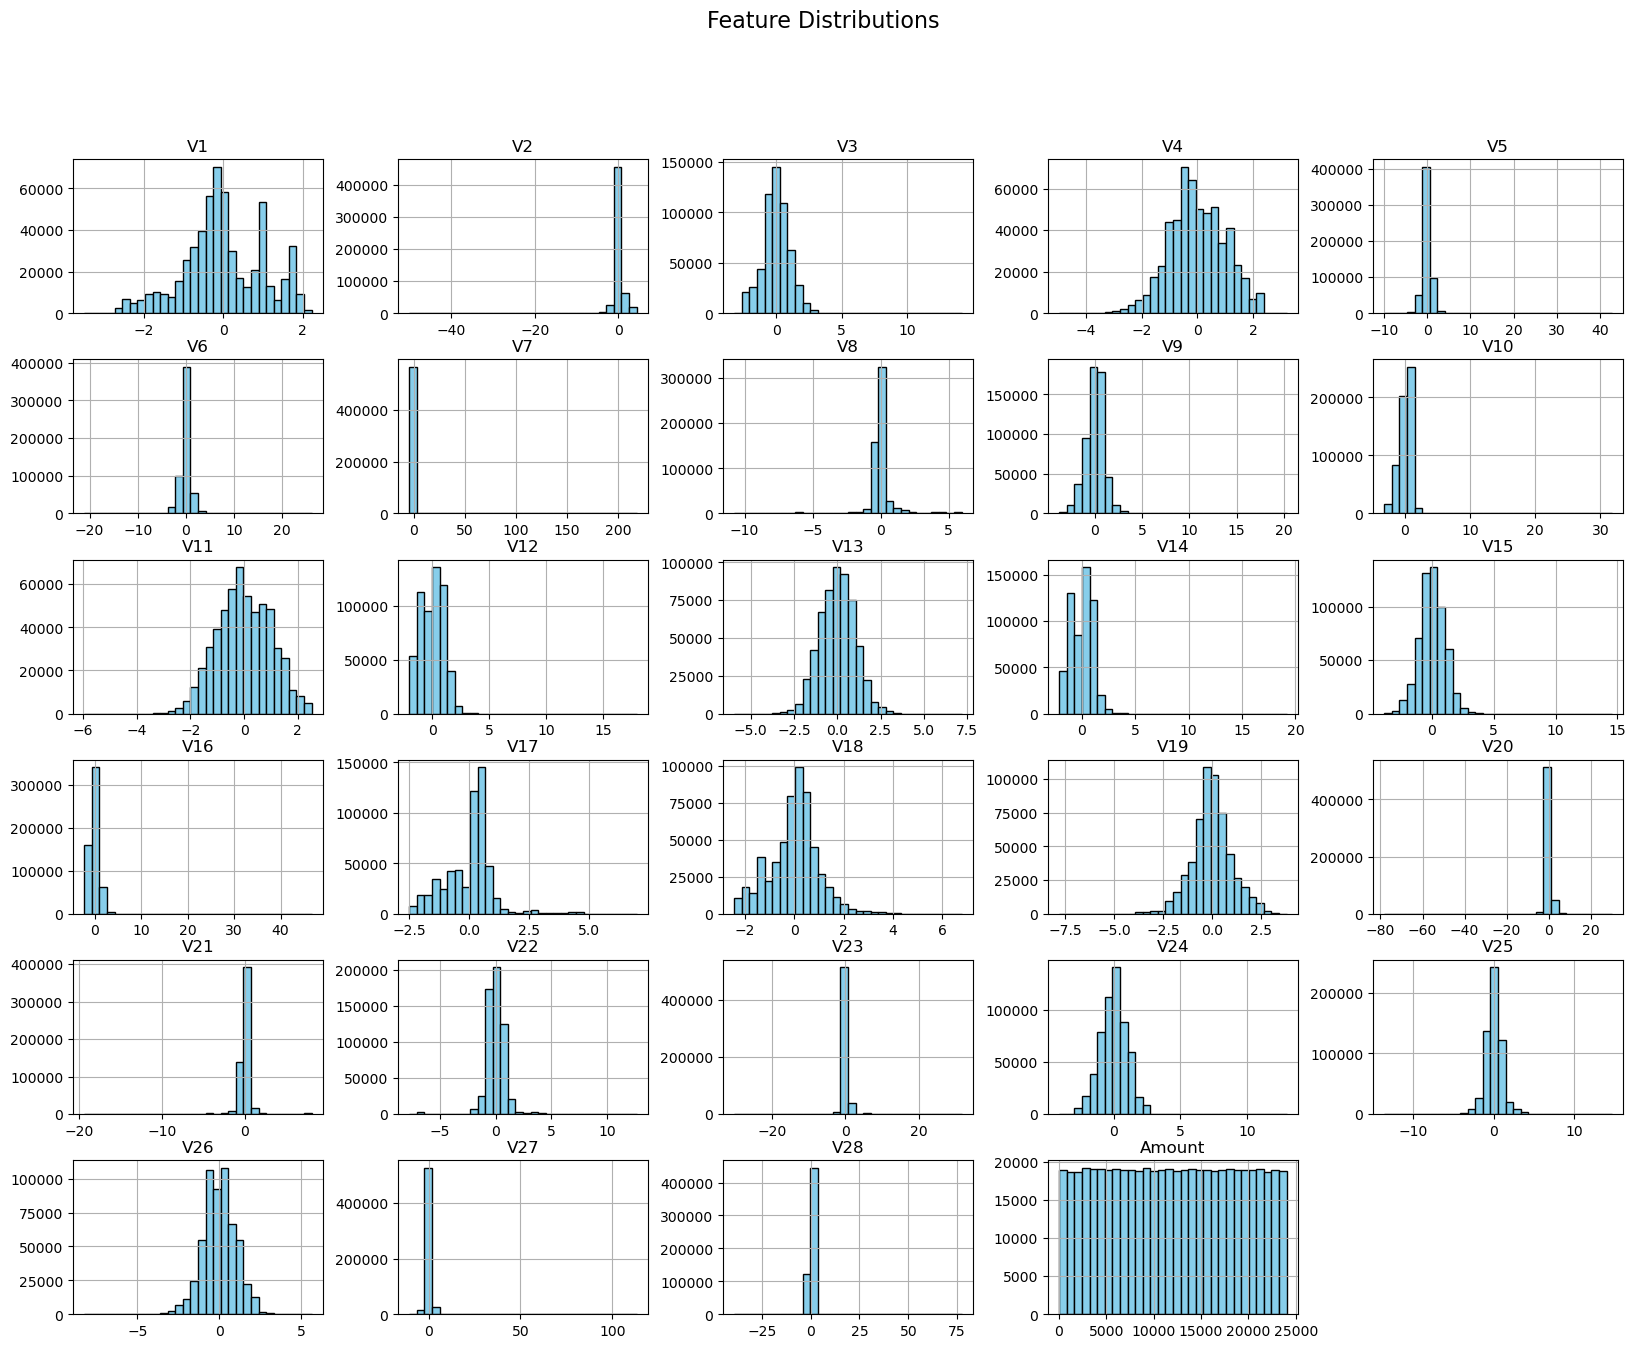

In [5]:
# 2. Feature Distributions
# Plot histograms for numerical features
numerical_features = dataset.drop(['id', 'Class'], axis=1).columns
dataset[numerical_features].hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

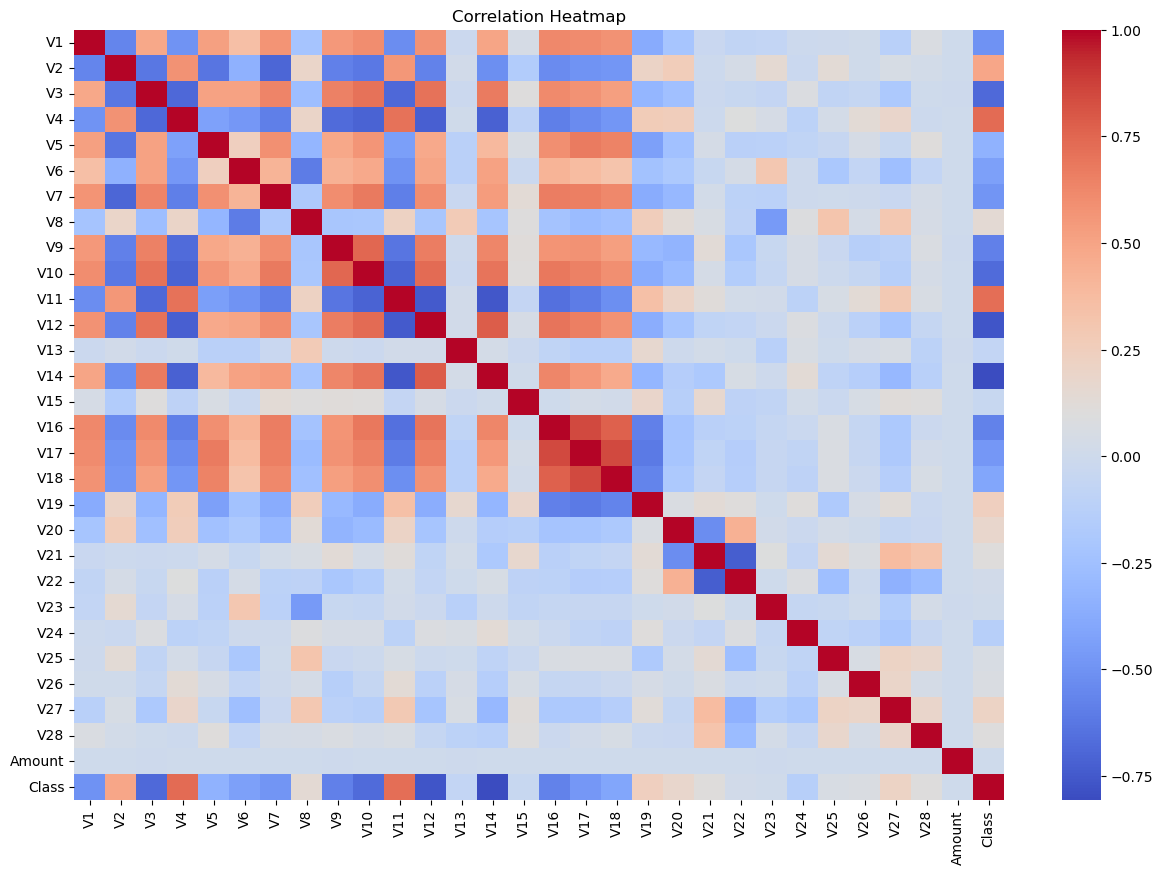

In [6]:
# 3. Correlation Heatmap
correlation_matrix = dataset.drop(['id'], axis=1).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

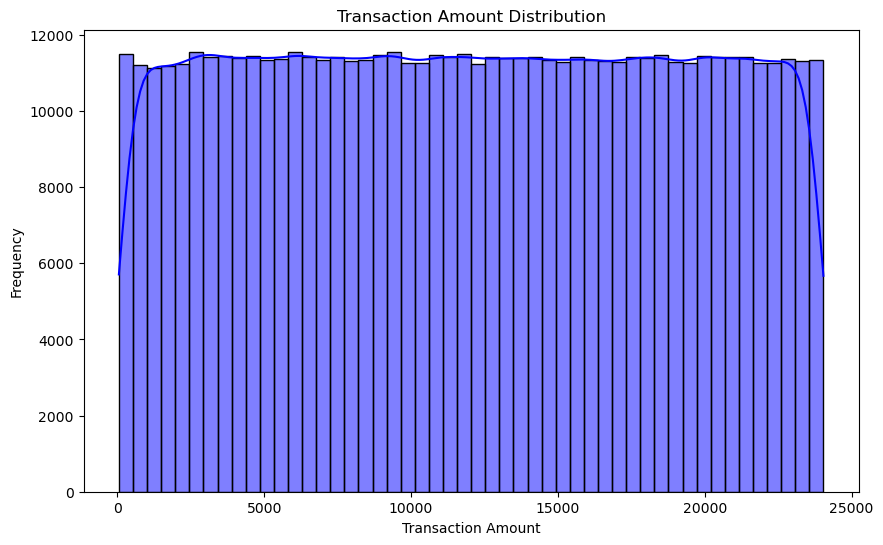

In [7]:
# 4. Transaction Amount Analysis
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Amount'], bins=50, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [13]:
# 5. Time Analysis
if 'Time' in dataset.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset['Time'], bins=50, kde=True, color='green')
    plt.title('Time Distribution of Transactions')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

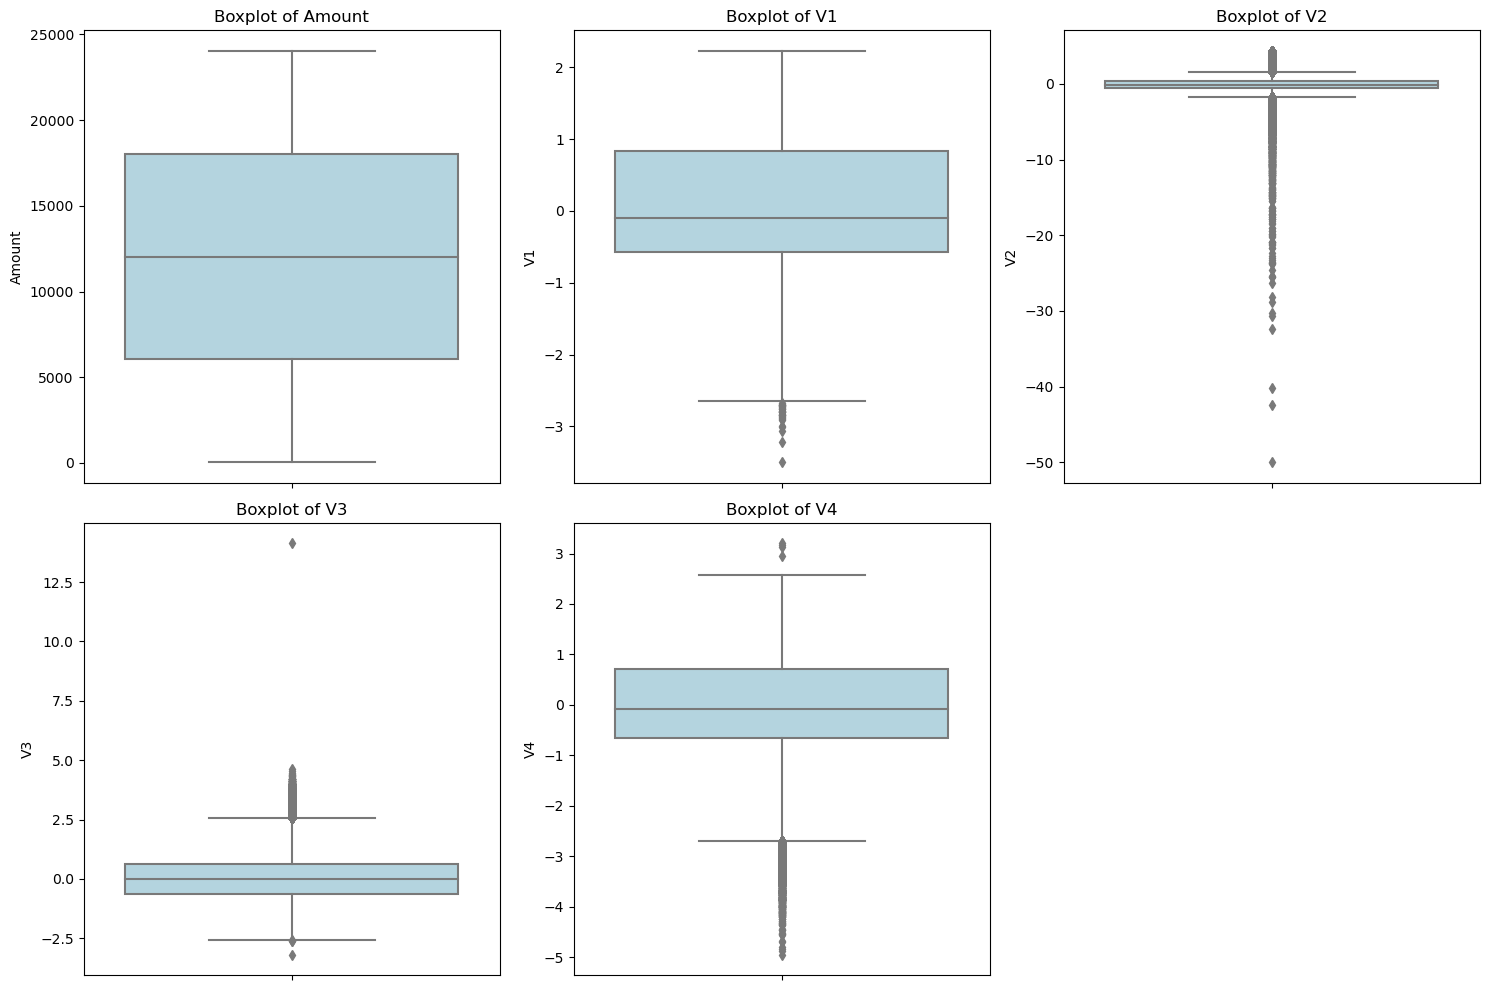

In [10]:
# 6. Outliers in Features
# Boxplots for key numerical features
key_features = ['Amount'] + [f'V{i}' for i in range(1, 5)]  # Adjust range for selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=dataset, y=feature, color='lightblue')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
pip install pandas scikit-learn matplotlib


In [17]:
import pandas as pd

file_path = r'C:\Users\ADMIN\OneDrive\Desktop\TERM 1\BEMM457 Topics in BA\creditcard_2023.csv'  # Use a raw string or replace backslashes with forward slashes
dataset = pd.read_csv(file_path)

print(dataset.head())  # Display the first 5 rows
print(dataset.info())  # Check dataset structure


   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [1]:
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\ADMIN\OneDrive\Desktop\TERM 1\BEMM457 Topics in BA\creditcard_2023.csv'
try:
    dataset = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print(dataset.head())
    print(dataset.info())
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Prepare the dataset
print("Preparing the dataset...")
X = dataset.drop(['id', 'Class'], axis=1)
y = dataset['Class']

# Split the dataset
print("Splitting the dataset...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

# Train the Random Forest Classifier
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Model training complete.")

# Predict and evaluate
print("Evaluating the model...")
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute and display AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


Dataset loaded successfully.
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26    

In [1]:
X = dataset.drop(['id', 'Class'], axis=1)
y = dataset['Class']
print(f"Features: {X.shape}, Target: {y.shape}")


NameError: name 'dataset' is not defined

In [2]:
import time

# Measure execution time for dataset loading
start_time = time.time()
dataset = pd.read_csv(file_path)
print(f"Dataset loaded in {time.time() - start_time:.2f} seconds.")

# Measure execution time for model training
start_time = time.time()
rf_model.fit(X_train, y_train)
print(f"Model trained in {time.time() - start_time:.2f} seconds.")



NameError: name 'pd' is not defined

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\ADMIN\OneDrive\Desktop\TERM 1\BEMM457 Topics in BA\creditcard_2023.csv'
try:
    dataset = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print(dataset.head())
    print(dataset.info())
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Prepare the dataset
print("Preparing the dataset...")
X = dataset.drop(['id', 'Class'], axis=1)
y = dataset['Class']

# Split the dataset
print("Splitting the dataset...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

# Train the Random Forest Classifier
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Model training complete.")

# Predict and evaluate
print("Evaluating the model...")
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute and display AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


Dataset loaded successfully.
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26    

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\ADMIN\OneDrive\Desktop\TERM 1\BEMM457 Topics in BA\creditcard_2023.csv'  # Update this path
dataset = pd.read_csv(file_path)

# Prepare the dataset
X = dataset.drop(['id', 'Class'], axis=1)  # Features
y = dataset['Class']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute and display AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC Score: {roc_auc:.2f}")


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\ADMIN\OneDrive\Desktop\TERM 1\BEMM457 Topics in BA\creditcard_2023.csv'  # Update this path
dataset = pd.read_csv(file_path)


In [2]:
# Import necessary libraries
import pandas as pd  # For handling data
import time  # For measuring execution time

# Measure execution time for dataset loading
file_path = r'C:\Users\ADMIN\OneDrive\Desktop\TERM 1\BEMM457 Topics in BA\creditcard_2023.csv'
start_time = time.time()
try:
    dataset = pd.read_csv(file_path)
    print(f"Dataset loaded in {time.time() - start_time:.2f} seconds.")
    print(dataset.head())  # Display first 5 rows
    print(dataset.info())  # Show dataset structure
except Exception as e:
    print(f"Error loading dataset: {e}")


Dataset loaded in 4.45 seconds.
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26 

In [3]:
dataset = dataset.sample(frac=0.1, random_state=42) 

In [5]:
# Import necessary libraries
import pandas as pd  # For handling data
from sklearn.ensemble import RandomForestClassifier  # For Random Forest
import time  # For measuring execution time

# Dataset loading (example)
file_path = r'C:\Users\ADMIN\OneDrive\Desktop\TERM 1\BEMM457 Topics in BA\creditcard_2023.csv'
dataset = pd.read_csv(file_path)

# Prepare a small test dataset (optional for faster execution)
X = dataset.drop(['id', 'Class'], axis=1)
y = dataset['Class']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")



Random Forest model trained successfully.


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     56750
           1       0.99      0.91      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.96      0.95      0.95    113726
weighted avg       0.96      0.95      0.95    113726


Confusion Matrix:
[[56423   327]
 [ 5054 51922]]

AUC-ROC Score: 0.99


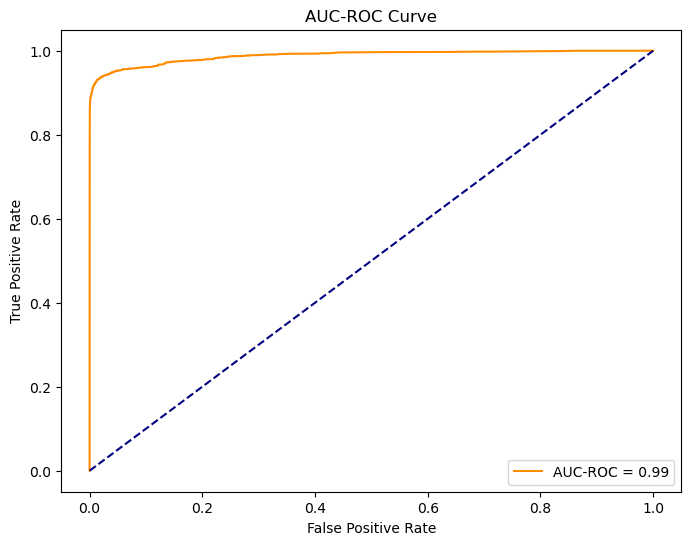

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Classification Report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nAUC-ROC Score: {roc_auc:.2f}")

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [7]:
pip install xgboost



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 812.7 kB/s eta 0:02:34
   ---------------------------------------- 0.3/124.9 MB 2.8 MB/s eta 0:00:45
   ---------------------------------------- 1.0/124.9 MB 6.6 MB/s eta 0:00:19
    --------------------------------------- 1.9/124.9 MB 9.5 MB/s eta 0:00:13
    --------------------------------------- 2.9/124.9 MB 11.4 MB/s eta 0:00:11
   - -------------------------------------- 3.8/124.9 MB 12.9 MB/s eta 0:00:10
   - -------------------------------------- 4.8/124.9 MB 13.8 MB/s eta 0:00:09
   - -------------------------------------- 5.7/124.9 MB 14.6 MB/s eta 0:00:09
   -- ----------------

C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:53:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Confusion Matrix for XGBoost:
[[56717    33]
 [    0 56976]]

AUC-ROC Score for XGBoost: 1.00


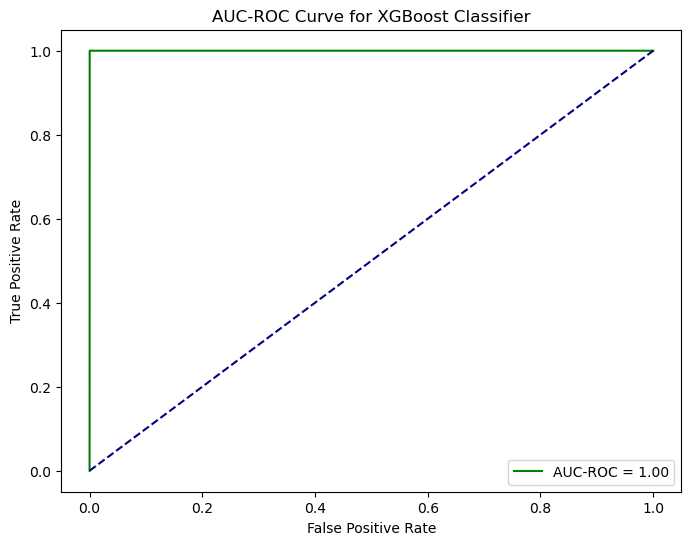

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Classification Report
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print("\nConfusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))

# AUC-ROC Score
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print(f"\nAUC-ROC Score for XGBoost: {roc_auc_xgb:.2f}")

# AUC-ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"AUC-ROC = {roc_auc_xgb:.2f}", color='green')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title("AUC-ROC Curve for XGBoost Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [10]:
import pandas as pd

# Metrics for Random Forest and XGBoost
metrics = {
    "Metric": ["Accuracy", "Precision (Class 1)", "Recall (Class 1)", "F1-Score (Class 1)", "AUC-ROC"],
    "Random Forest": [0.95, 0.99, 0.91, 0.95, 0.99],
    "XGBoost": [1.00, 1.00, 1.00, 1.00, 1.00]
}

# Create a DataFrame
comparison_table = pd.DataFrame(metrics)

# Display the table
print(comparison_table)


                Metric  Random Forest  XGBoost
0             Accuracy           0.95      1.0
1  Precision (Class 1)           0.99      1.0
2     Recall (Class 1)           0.91      1.0
3   F1-Score (Class 1)           0.95      1.0
4              AUC-ROC           0.99      1.0


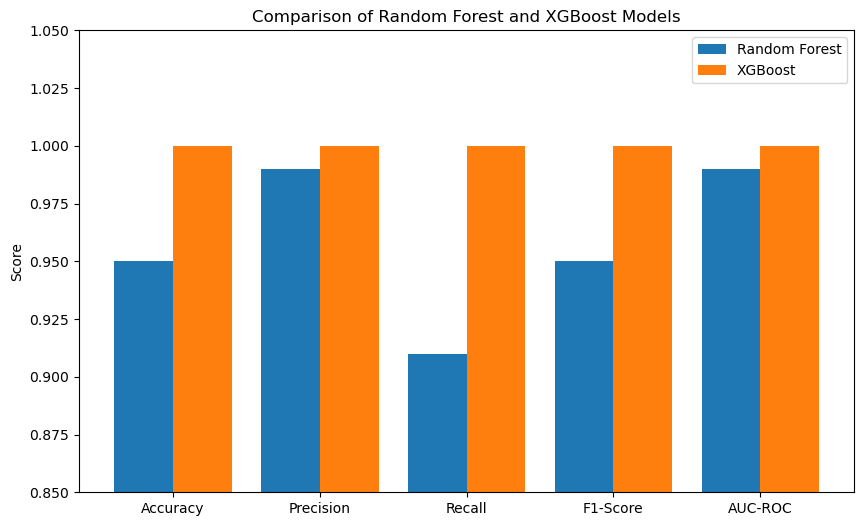

In [11]:
import matplotlib.pyplot as plt

# Metrics for plotting
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]
rf_scores = [0.95, 0.99, 0.91, 0.95, 0.99]
xgb_scores = [1.00, 1.00, 1.00, 1.00, 1.00]

# Plot the comparison
x = range(len(metrics))
plt.figure(figsize=(10, 6))
plt.bar([p - 0.2 for p in x], rf_scores, width=0.4, label="Random Forest", align="center")
plt.bar([p + 0.2 for p in x], xgb_scores, width=0.4, label="XGBoost", align="center")
plt.xticks(x, metrics)
plt.ylim(0.85, 1.05)
plt.ylabel("Score")
plt.title("Comparison of Random Forest and XGBoost Models")
plt.legend()
plt.show()
